# Lakshay Dang

## **How do factors like a person's age, race, or sex affect their chances of committing suicide?**


### Refined Sub Problems:
- The Black Lives Matter movement emerged in 2013 and 2014, is there a correlation between significant events in the BLM movement and the suicide rate for Black people in the US between the years 2012 and 2014?
- Do more men commit gun-related suicides or women? 
- How does the suicide rate vary with different age groups (For eg. rate for people 13-19, 20-40, and 40 above)? Does this correlation change when we factor in sex?
- Is there a correlation betwen a person's age, sex, race, and the type of location that they commit suicide?
- How does suicide rate differ between different ethnicity groups?
- Is there a significant difference between the number of Black and Hispanic teenagers and young adults that commit gun-related suicide and the number of White people belonging to the same age group?
- Is there a correlation between educational status and suicide rate? Does this correlation change when we factor in race and sex?

# Analysis Pipeline

## Step 1: Loading and Processing Data


In [2]:
from project_functions3 import *
importLibraries()

df_cleaned = load_and_process("../data/raw/full_data.csv")
df_cleaned.head(10)

,year,month,intent,sex,age,race,place,education
0,2012,1,Suicide,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,F,21.0,White,Street,Some college
2,2012,1,Suicide,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,M,64.0,White,Home,BA+
4,2012,2,Suicide,M,31.0,White,Other specified,HS/GED
5,2012,2,Suicide,M,17.0,Native American/Native Alaskan,Home,Less than HS
6,2012,3,Suicide,M,41.0,Native American/Native Alaskan,Home,HS/GED
8,2012,2,Suicide,M,30.0,White,Home,Some college
9,2012,1,Suicide,M,21.0,Native American/Native Alaskan,Home,HS/GED
10,2012,3,Suicide,M,43.0,White,Home,Less than HS


Now, let's get a better understanding of the different values for each of our variables.

In [3]:
print("Number of unique values per column:\n" , df_cleaned.nunique(axis = 0))
df_cleaned.describe()

Number of unique values per column:
 year          3
month        12
intent        1
sex           2
age          93
race          5
place        10
education     4
dtype: int64


,year,month,age
count,62291.000000,62291.000000,62291.000000
mean,2013.010900,6.496300,50.207927
std,0.815168,3.403024,19.221887
min,2012.000000,1.000000,9.000000
25%,2012.000000,4.000000,35.000000
50%,2013.000000,7.000000,51.000000
75%,2014.000000,9.000000,64.000000
max,2014.000000,12.000000,102.000000


Looking at the numeric columns doesn't really give us any new insight other than the fact that more than 75% of the victims are below the age of 60, with an average victim age of about 44.

In [4]:
print("Intent: " , df_cleaned.intent.unique())
print("Race: " , df_cleaned.race.unique())
print("Place: " , df_cleaned.place.unique())
print("Education: " , df_cleaned.education.unique())

Intent:  ['Suicide']
Race:  ['Asian/Pacific Islander' 'White' 'Native American/Native Alaskan' 'Black'
 'Hispanic']
Place:  ['Home' 'Street' 'Other specified' 'Other unspecified'
 'Trade/service area' 'Sports' 'School/instiution' 'Farm'
 'Industrial/construction' 'Residential institution']
Education:  ['BA+' 'Some college' 'HS/GED' 'Less than HS']


In terms of categorical columns, it seems like 'Race' and 'Place' might be columns that we can gain some useful insight from in order to answer our questions.

## Step 2: Analyzing Relationships via Visualizations

In [18]:
sns.set_theme(style = "ticks", font_scale = 1.3)
sns.set_palette("bright")

First up, let's try to answer the following question:

**How does the suicide rate vary with different age groups (For eg. rate for people 13-19, 20-40, and 40 above)?**

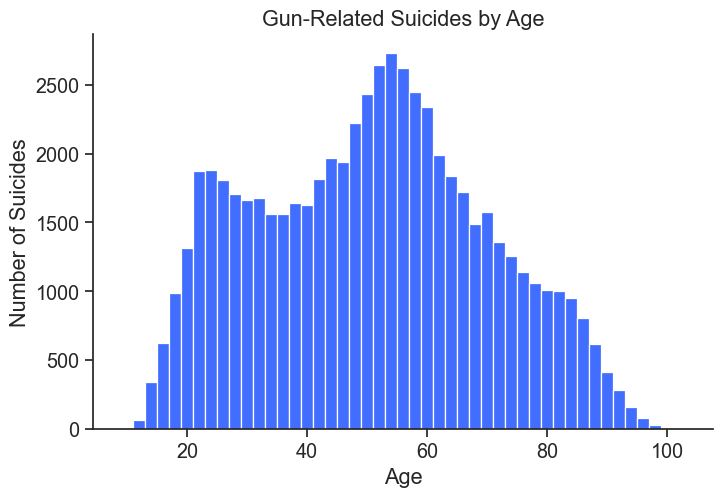

In [19]:
agePlot = sns.displot(df_cleaned, x = 'age', binwidth =  2, height = 5, aspect = 1.5 )
agePlot.set(title = 'Gun-Related Suicides by Age', xlabel = 'Age', ylabel = 'Number of Suicides')


From the graph, we see that:

- The age group 50 - 60 had the most incidents of gun-related suicides
- Teens (< 20 years) were involved in surprisingly little gun-related suicide incidents as compared to people in older age groups

It is also important to note that even though there may seem like a decline in the number of suicides between the ages 25-35, this is not that significant of a decline since there is only a difference of less than 500 cases over the span of two years (2012 - 2014).

Next up, let's use a countplot to try to answer the question:

**Is there a significant difference between the number of Black and Hispanic teenagers and young adults that commit gun-related suicide and the number of White people belonging to the same age group?**

We begin by creating a temporary dataframe that only contains records of White, Black, or Hispanic victims.

In [20]:
df_temp = df_cleaned[(df_cleaned.race == 'White') | (df_cleaned.race == 'Black') | (df_cleaned.race == 'Hispanic')]

df_temp

,year,month,intent,sex,age,race,place,education
1,2012,1,Suicide,F,21.0,White,Street,Some college
2,2012,1,Suicide,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,M,64.0,White,Home,BA+
4,2012,2,Suicide,M,31.0,White,Other specified,HS/GED
8,2012,2,Suicide,M,30.0,White,Home,Some college
...,...,...,...,...,...,...,...,...
63169,2014,11,Suicide,F,66.0,Black,Other specified,BA+
63170,2014,11,Suicide,M,70.0,White,Street,HS/GED
63171,2014,12,Suicide,M,64.0,White,Home,BA+
63173,2014,12,Suicide,M,27.0,White,Home,BA+


Now, we can start plotting!

Text(0.5, 1.0, 'Hispanic')

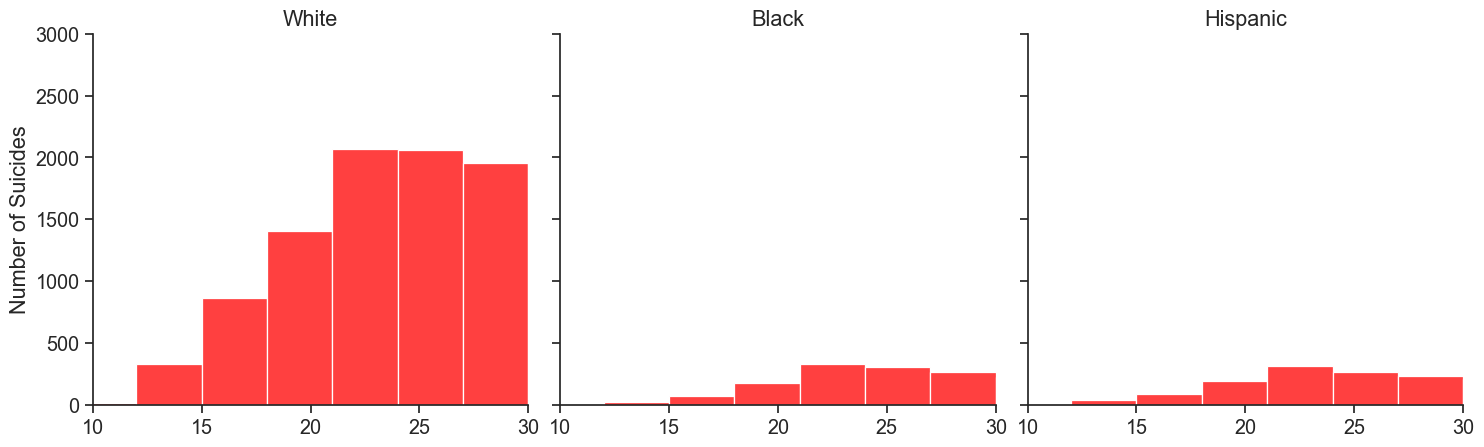

In [23]:
g = sns.displot(
    df_temp, x="age", col="race",
    binwidth=3, height=5, facet_kws=dict(margin_titles=True), color = 'red'
)
g.set(xlabel = "", ylabel = 'Number of Suicides', xlim = (10,30), ylim = (0,3000))

fig = g.figure

a1 = fig.axes[0]
a1.set_title("White")
a2 = fig.axes[1]
a2.set_title("Black")
a3 = fig.axes[2]
a3.set_title("Hispanic")




We see that there is quite a big disparity between gun-related suicides among White young adults vs Black and Hispanic young adults.

Next, it might be useful to look at how the number of gun-related suicides has changed from 2012 to 2014, while keeping in mind some significant changes to gun-related policies that were made during the same time. Thus, we attempt to gain insight about the question:

**How has the number of gun-related suicides change with time? Does it have a correlation with changes in gun policies over the years 2012 to 2014?**

To answer this question, it might be helpful to see how the number of suicides changes over the entire three year period, instead of trying to split the data into smaller graphs.

In [28]:
df_time = df_cleaned.copy()
df_time["decYear"] = df_cleaned['year'] + (df_cleaned['month']/12)
df_time

,year,month,intent,sex,age,race,place,education,decYear
0,2012,1,Suicide,M,34.0,Asian/Pacific Islander,Home,BA+,2012.083333
1,2012,1,Suicide,F,21.0,White,Street,Some college,2012.083333
2,2012,1,Suicide,M,60.0,White,Other specified,BA+,2012.083333
3,2012,2,Suicide,M,64.0,White,Home,BA+,2012.166667
4,2012,2,Suicide,M,31.0,White,Other specified,HS/GED,2012.166667
...,...,...,...,...,...,...,...,...,...
63170,2014,11,Suicide,M,70.0,White,Street,HS/GED,2014.916667
63171,2014,12,Suicide,M,64.0,White,Home,BA+,2015.000000
63172,2014,12,Suicide,M,39.0,Asian/Pacific Islander,Home,BA+,2015.000000
63173,2014,12,Suicide,M,27.0,White,Home,BA+,2015.000000


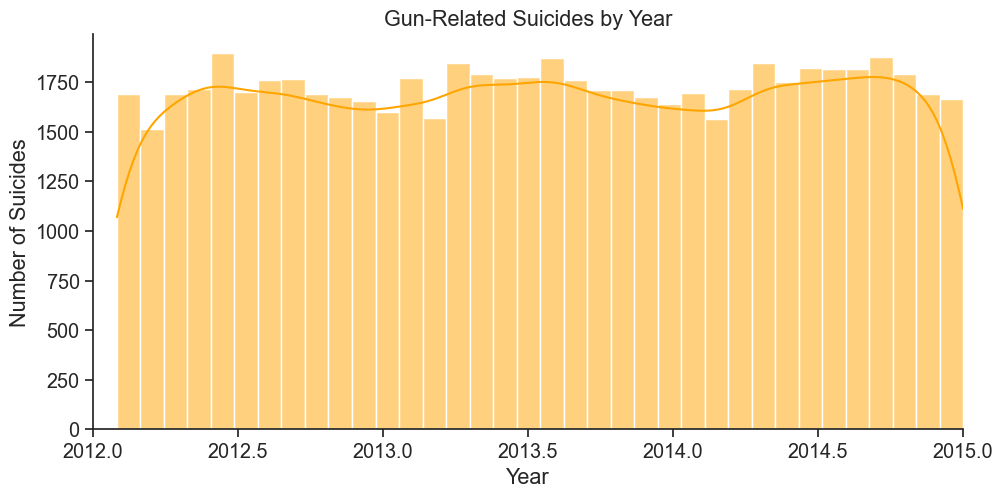

In [30]:
g = sns.displot(data = df_time, x = 'decYear', height = 5, aspect = 2, kde = True, bins = 36, color = 'orange')
g.set(title = "Gun-Related Suicides by Year", xlabel = "Year", ylabel = "Number of Suicides",xlim = (2012,2015))

The only information we are able to gather from the plot above is that the number of suicide incidents fall by a very small margin towards the end of the year, during the holidays.

Next, we shall look at the relationship between the person's age, race, and sex using a violin plot in order to find general trends.

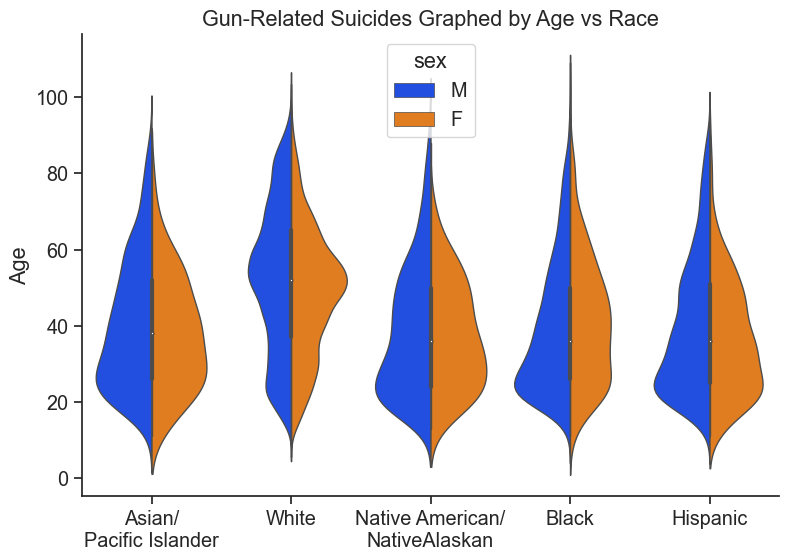

In [27]:
plt.figure(figsize=(9, 6))
g = sns.violinplot(data=df_cleaned, x="race", y="age", hue="sex",
               split=True, inner="box", linewidth=1)
g.set(title = "Gun-Related Suicides Graphed by Age vs Race" , xlabel = "", ylabel = "Age")
g.set_xticklabels(['Asian/\nPacific Islander', 'White', 'Native American/\nNativeAlaskan','Black','Hispanic'])
sns.despine()



The insights we get from this plot are:

- While the number of male vs female suicides vary a bit with age and race, the numbers are quite similar.
- There is a trend of more younger males comitting suicide using guns as compared to younger females in minority groups.
- Generally, the number of older white victims is more than older victims belonging to other racial groups.

Now, let's shift gears and look at an aspect of the data we have largely ignored up until now: The type of location where the incidents occur. We thus aim to try to answer the question:

**Is there a correlation betwen a person's age, sex, race, and the type of location that they commit suicide?**

We can start off by plotting age, sex, and location.

D:\miniconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


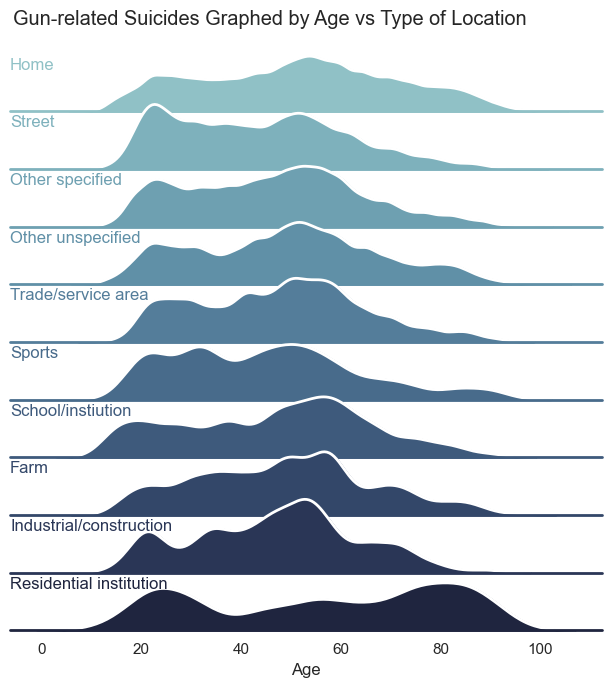

In [106]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

#Initializing the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_cleaned, row="place", hue="place", aspect=15, height=.5, palette=pal)
g.fig.set_figheight(7)
g.fig.set_figwidth(7)



# Draw the densities in a few steps
g.map(sns.kdeplot, "age",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "age", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .6, label, color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "age")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set( xlabel = "Age",ylabel = "",  yticks=[])
g.fig.suptitle('Gun-related Suicides Graphed by Age vs Type of Location')
g.despine(bottom=True, left=True)


We see that generally more street suicides involve younger victims, while suicides in places of work (Farms, Industrial areas) involve older victims.

Another interesting thing that the plot tells us is that a majority of victims aged above 70 commit a gun-related suicide in residential institutions.

Now, it is important to note that a huge majority of cases in this databases involve white victims, which can sometimes make it harder to look at data involving victims of minroty groups. Therefore, it seems best to look past white victims in order to find hidden trends in our data.

In [95]:
df_minority = df_cleaned[df_cleaned['race'] != "White"]
df_minority = df_white.reset_index().drop(columns = 'index')
df_minority

,year,month,intent,sex,age,race,place,education
0,2012,1,Suicide,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,2,Suicide,M,17.0,Native American/Native Alaskan,Home,Less than HS
2,2012,3,Suicide,M,41.0,Native American/Native Alaskan,Home,HS/GED
3,2012,1,Suicide,M,21.0,Native American/Native Alaskan,Home,HS/GED
4,2012,3,Suicide,M,34.0,Native American/Native Alaskan,Home,HS/GED
...,...,...,...,...,...,...,...,...
7671,2014,11,Suicide,M,45.0,Hispanic,Home,Some college
7672,2014,10,Suicide,M,42.0,Black,Home,Some college
7673,2014,11,Suicide,F,66.0,Black,Other specified,BA+
7674,2014,12,Suicide,M,39.0,Asian/Pacific Islander,Home,BA+


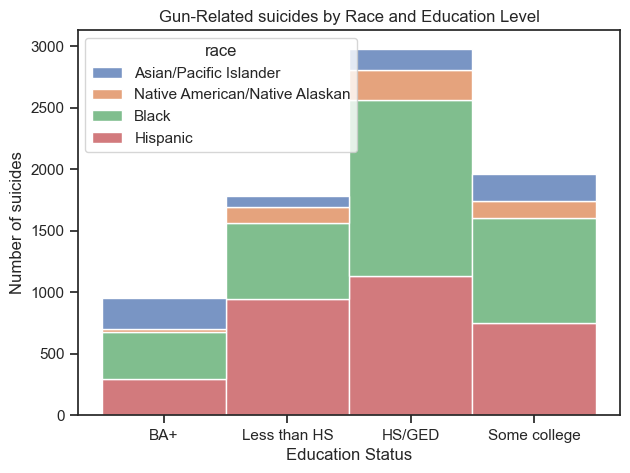

In [105]:
plt.figure(figsize = (7,5))
g = sns.histplot(binwidth=0.5, x="education", hue="race", data=df_minority, stat="count", multiple="stack")
g.set(title = "Gun-Related suicides by Race and Education Level", xlabel = "Education Status", ylabel = "Number of suicides")
sns.move_legend(g, "upper left")

We note that:
- The second largest majority of suicide victims in our dataset are Black.
- A majority of gun-related suicide victims are High School graduates.
- In the Asian community, more college graduates than high school graduates commit gun-related suicide, which is not the case for any other racial group.


# Take-Aways from the Data Analysis

- The age group 50 - 60 had the most incidents of gun-related suicides
- Teens (< 20 years) were involved in surprisingly little gun-related suicide incidents as compared to people in older age groups
- There is a big disparity between records of gun-related suicides among White young adults vs Black and Hispanic young adults.
- While the number of male vs female suicides vary a bit with age and race, the numbers are quite similar.
- There is a trend of more younger males comitting suicide using guns as compared to younger females in minority groups.
- Generally, the number of older white victims is more than older victims belonging to other racial groups.
- Generally, more street suicides involve younger victims, while suicides in places of work (Farms, Industrial areas) involve older victims.
- A majority of victims aged above 70 commit a gun-related suicide in residential institutions.
- The second largest majority of suicide victims in our dataset are Black.
- A majority of gun-related suicide victims are High School graduates.
- In the Asian community, more college graduates than high school graduates commit gun-related suicide, which is not the case for any other racial group.